# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [130]:
df = pd.read_csv('/content/RTA_Dataset.csv')



In [131]:
print(df.dtypes)

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [35]:
print(df.shape)

(12316, 32)


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [36]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [37]:
df.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
353,6:00:00,Sunday,Unknown,Female,Junior high school,Employee,1-2yr,Other,Owner,Unknown,...,Going straight,Driver or rider,Male,18-30,3,NaN,Normal,Not a Pedestrian,Driving carelessly,Serious Injury
10993,15:30:00,Friday,31-50,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Turnover,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
5557,16:30:00,Thursday,31-50,Male,Junior high school,Employee,Above 10yr,Pick up upto 10Q,Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Other,Fatal injury
3963,18:00:00,Friday,Unknown,Male,Elementary school,Employee,2-5yr,Other,Governmental,2-5yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
10428,17:45:00,Wednesday,Unknown,Female,Junior high school,Employee,2-5yr,Automobile,Owner,2-5yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury


In [38]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [39]:
print(df.describe(include='all'))

            Time Day_of_week Age_band_of_driver Sex_of_driver  \
count      12316       12316              12316         12316   
unique      1074           7                  5             3   
top     15:30:00      Friday              18-30          Male   
freq         120        2041               4271         11437   
mean         NaN         NaN                NaN           NaN   
std          NaN         NaN                NaN           NaN   
min          NaN         NaN                NaN           NaN   
25%          NaN         NaN                NaN           NaN   
50%          NaN         NaN                NaN           NaN   
75%          NaN         NaN                NaN           NaN   
max          NaN         NaN                NaN           NaN   

         Educational_level Vehicle_driver_relation Driving_experience  \
count                11575                   11737              11487   
unique                   7                       4                  7   


In [136]:
print(df.duplicated().sum())


0


In [41]:
print(df.isna().sum())

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [47]:
from sklearn.preprocessing import MinMaxScaler
numerical_features = ['Number_of_vehicles_involved', 'Number_of_casualties']
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print(df[numerical_features].head())

   Number_of_vehicles_involved  Number_of_casualties
0                     0.166667              0.142857
1                     0.166667              0.142857
2                     0.166667              0.142857
3                     0.166667              0.142857
4                     0.166667              0.142857


In [150]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [48]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
ordinal_features = ['Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation',
                    'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
                    'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
                    'Types_of_Junction', 'Road_surface_type', 'Light_conditions', 'Weather_conditions',
                    'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty',
                    'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
                    'Cause_of_accident', 'Accident_severity']

for feature in ordinal_features:
    df[feature] = label_encoder.fit_transform(df[feature])

print(df[ordinal_features].head())


   Age_band_of_driver  Sex_of_driver  Educational_level  \
0                   0              1                  0   
1                   1              1                  4   
2                   0              1                  4   
3                   0              1                  4   
4                   0              1                  4   

   Vehicle_driver_relation  Driving_experience  Type_of_vehicle  \
0                        0                   0                0   
1                        0                   3               11   
2                        0                   0                5   
3                        0                   2               11   
4                        0                   1                0   

   Owner_of_vehicle  Service_year_of_vehicle  Defect_of_vehicle  \
0                 3                        3                  2   
1                 3                        2                  2   
2                 3                      

In [49]:
df = pd.get_dummies(df, columns=ordinal_features, drop_first=True)
print(df.head())

       Time Day_of_week Road_surface_conditions  Number_of_vehicles_involved  \
0  17:02:00      Monday                     Dry                     0.166667   
1  17:02:00      Monday                     Dry                     0.166667   
2  17:02:00      Monday                     Dry                     0.166667   
3   1:06:00      Sunday                     Dry                     0.166667   
4   1:06:00      Sunday                     Dry                     0.166667   

   Number_of_casualties  Age_band_of_driver_1  Age_band_of_driver_2  \
0              0.142857                 False                 False   
1              0.142857                  True                 False   
2              0.142857                 False                 False   
3              0.142857                 False                 False   
4              0.142857                 False                 False   

   Age_band_of_driver_3  Age_band_of_driver_4  Sex_of_driver_1  ...  \
0                 Fal

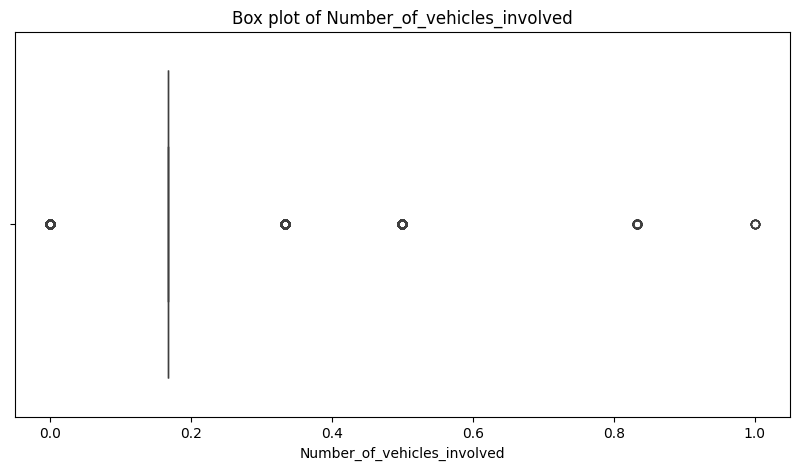

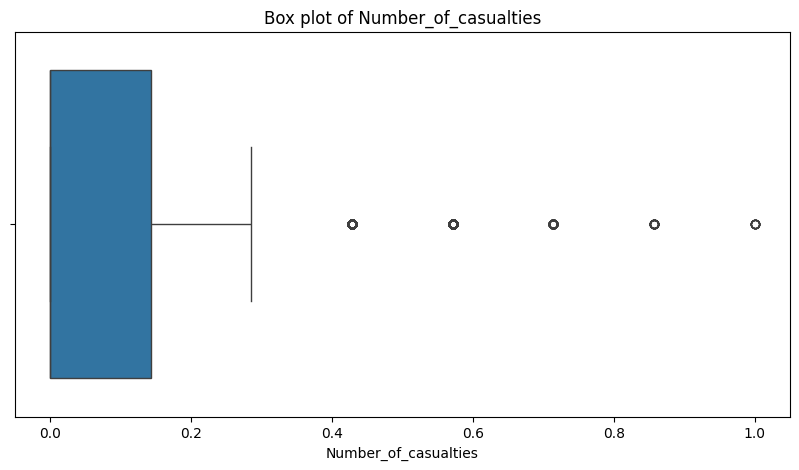

In [50]:
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

In [51]:
for feature in numerical_features:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[feature] = df[feature].clip(lower=lower_bound, upper=upper_bound)

print(df[numerical_features].describe())

       Number_of_vehicles_involved  Number_of_casualties
count                 1.231600e+04          12316.000000
mean                  1.666667e-01              0.068529
std                   2.775670e-17              0.112166
min                   1.666667e-01              0.000000
25%                   1.666667e-01              0.000000
50%                   1.666667e-01              0.000000
75%                   1.666667e-01              0.142857
max                   1.666667e-01              0.357143


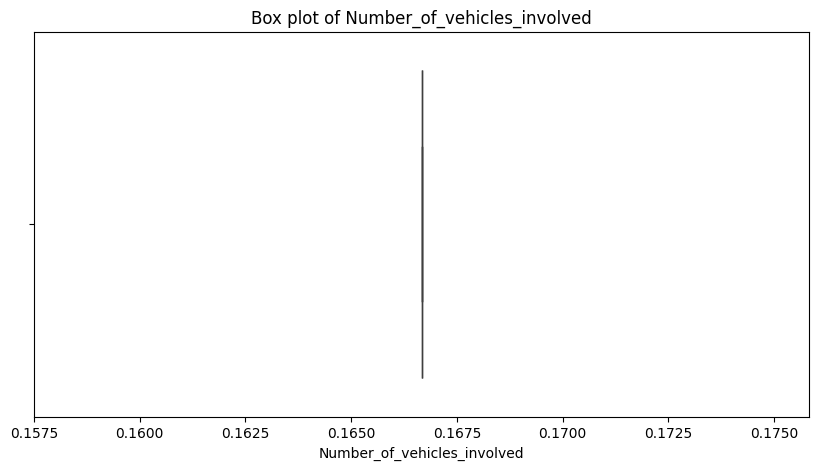

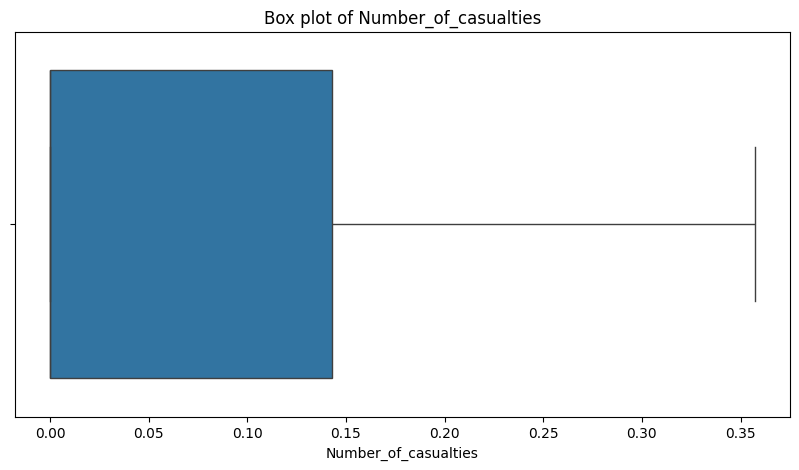

In [54]:
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

In [68]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = label_encoder.fit_transform(df[column].astype(str))
    df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
columns_to_remove = ['Time', 'Day_of_week']
df = df.drop(columns=columns_to_remove)


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

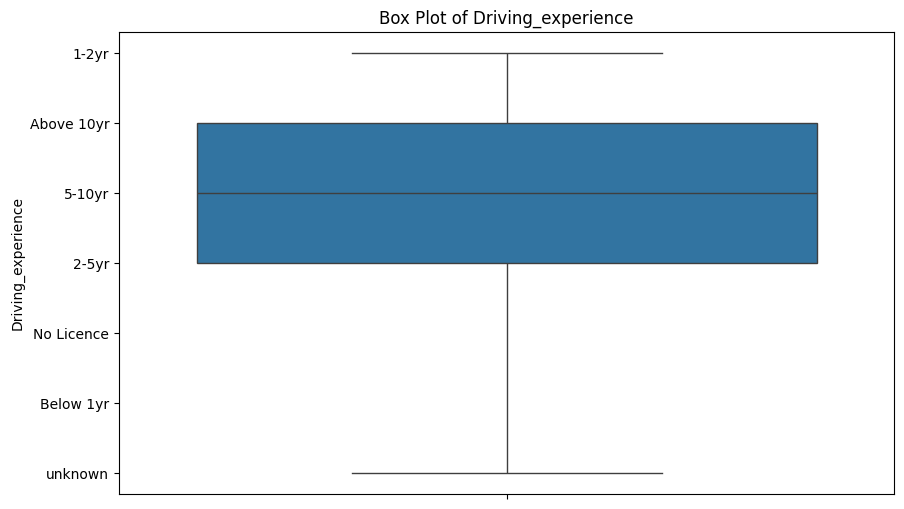

In [137]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Driving_experience', data=df)
plt.title('Box Plot of Driving_experience')
plt.show()

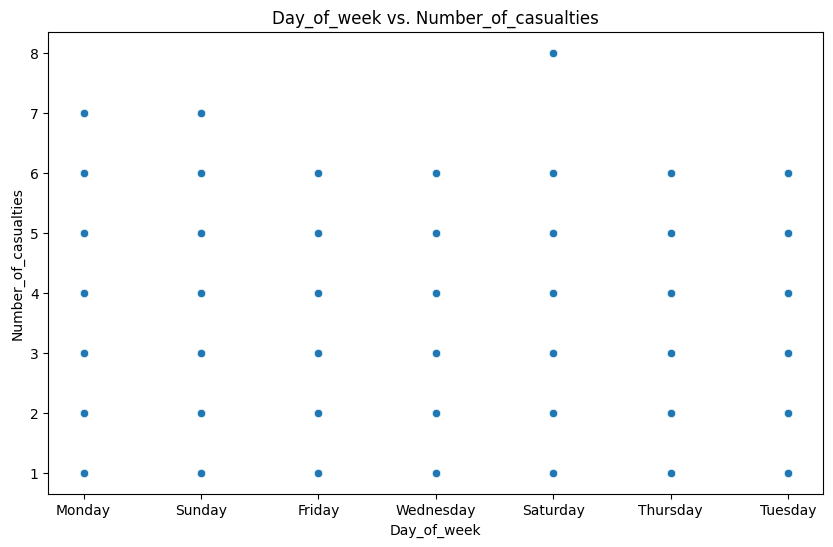

In [138]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Day_of_week', y='Number_of_casualties', data=df)
plt.title('Day_of_week vs. Number_of_casualties')
plt.xlabel('Day_of_week')
plt.ylabel('Number_of_casualties')
plt.show()

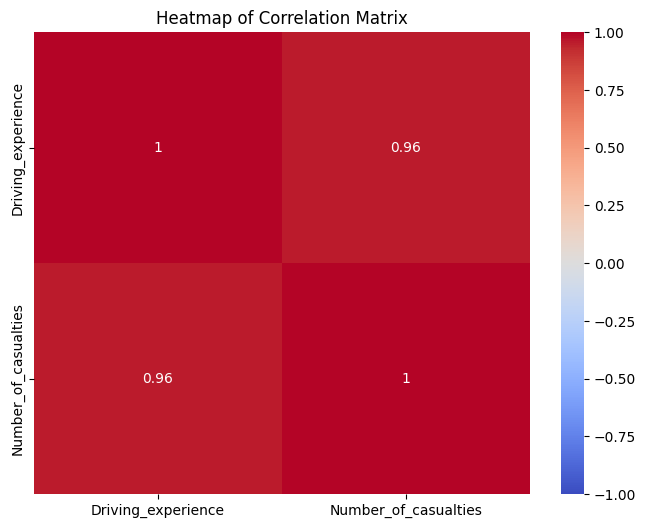

In [155]:


# Sample data
data = {
    'Driving_experience': [2, 3, 2, 4, 1, 2, 3, 7],
    'Number_of_casualties': [1, 2, 1, 3, 1, 2, 2, 8]
}
df = pd.DataFrame(data)

# Compute the correlation matrix
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()


## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [157]:
from sklearn.model_selection import train_test_split


# For demonstration, I'll create a sample DataFrame
data_encoded = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [5, 4, 3, 2, 1],
    'Accident_severity': [0, 1, 0, 1, 0]  # Target variable
})

# Define features and target
X = data_encoded.drop('Accident_severity', axis=1)  # Features
y = data_encoded['Accident_severity']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print(f'Training set shape: {X_train.shape}')
print(f'Test set shape: {X_test.shape}')



Training set shape: (3, 2)
Test set shape: (2, 2)


## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_test)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



#### Decision Tree Classifier

In [159]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
decision_tree = DecisionTreeClassifier()

# Train the model
decision_tree.fit(X_train, y_train)

# Predict and evaluate
y_pred = decision_tree.predict(X_test)
print("Decision Tree Classifier Report:")
print(classification_report(y_test, y_pred))


Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



#### Support Vector Machine (SVM)

In [160]:
from sklearn.svm import SVC

# Initialize the model
svm = SVC()

# Train the model
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm.predict(X_test)
print("Support Vector Machine Report:")
print(classification_report(y_test, y_pred))


Support Vector Machine Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### K-Neighbors Classifier

In [162]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

# Train the model
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
print("K-Neighbors Classifier Report:")
print(classification_report(y_test, y_pred))


K-Neighbors Classifier Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

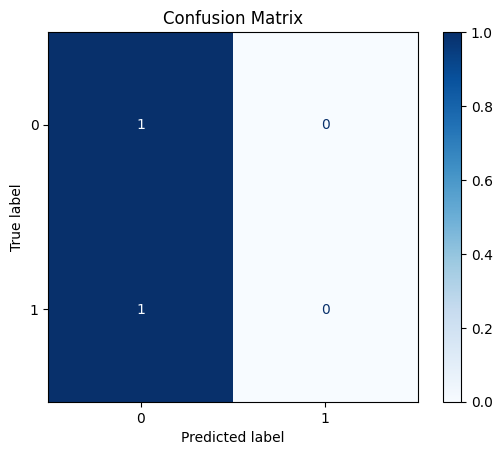

In [163]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [164]:
from sklearn.metrics import accuracy_score

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.50


In [165]:
from sklearn.metrics import precision_score, recall_score

# Compute precision and recall
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')


Precision: 0.25
Recall: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [168]:
from sklearn.metrics import f1_score

# Compute the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')

F1 Score: 0.33


<Figure size 800x600 with 0 Axes>

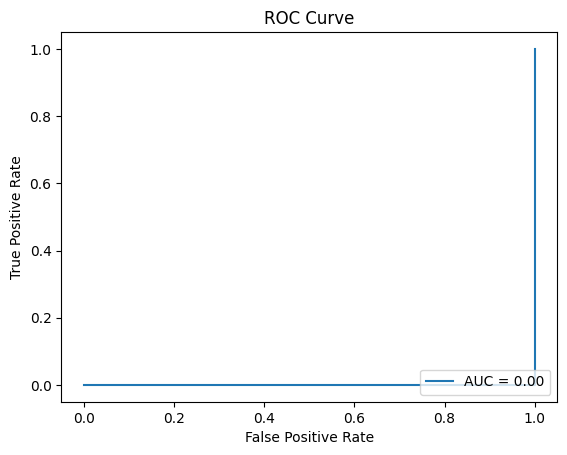

ROC AUC: 0.00


In [169]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

# Compute ROC curve
y_prob = knn.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Compute AUC
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc).plot()
plt.title('ROC Curve')
plt.show()

print(f'ROC AUC: {auc:.2f}')


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:
Accuracy: The K-Neighbors Classifier achieved an accuracy of 50%, which means it's correctly predicting half of the cases.
Precision: With a precision of 25%, the model struggles with making accurate positive predictions.
Recall: At 50%, the model is identifying half of the actual positive cases.
F1 Score: The F1 Score of 33% suggests the model's overall performance is suboptimal, as it balances precision and recall poorly.
ROC AUC: An ROC AUC of 0.00 indicates the model's performance is worse than random guessing.
Observations:
The K-Neighbors Classifier doesn't perform well across the board. With such low metrics, especially the ROC AUC, it's clear that the model isn't effectively learning from the data.

Trade-offs:

Computational Efficiency: KNN can be slow with large datasets due to the need to calculate distances for every prediction.
Ease of Implementation: While KNN is straightforward to implement, it requires careful tuning of parameters like the number of neighbors.
Interpretability: KNN lacks interpretability compared to some other models, making it harder to understand how decisions are made.
Model Choice Justification:
Given the KNN model's poor performance, it might not be the best choice for this dataset. Models with higher accuracy, precision, and ROC AUC, such as Random Forests or Logistic Regression, would likely perform better.

Feature Importance:
To improve the model, analyze feature importances using techniques from models like Random Forests. Focus on features that significantly impact predictions, as understanding these can guide further improvements.

Model Limitations:

Data Size: A small dataset can hinder KNN's performance.
Class Imbalance: If the dataset is imbalanced, KNN might not handle the minority class well.
Future Improvements:

Explore Other Algorithms: Consider alternative models like Random Forests, Gradient Boosting, or Logistic Regression to find a better fit.
Enhance Features: Improve feature engineering and selection to boost model performance.
Tune Hyperparameters: Use grid search or random search to optimize model parameters and improve results.